In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [113]:
import xlrd
df= pd.read_excel(r"C:\Users\Rithika\Desktop\Grades.xlsx")
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [114]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [115]:
grades_mapping = {'A+': 10, 'A': 9, 'A-': 8,'B+': 7, 'B': 6, 'B-': 5,'C+': 4, 'C': 3, 'C-': 2,'D+': 1, 'D': 0}

data_numeric = df.replace(grades_mapping)

df=data_numeric

df


,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,5,1,2,3,2,1,0,2,5,...,2,2,2.0,2,8,9,2,6,8,2.205
1,CS-97002,9,0,1,0,5,3,0,9,1,...,1,0,3.0,0,8,5,3,3,6,2.008
2,CS-97003,9,6,9,5,7,9,5,7,8,...,6,6,9.0,3,9,9,9,8,9,3.608
3,CS-97004,0,4,1,0,0,8,1,2,0,...,1,3,1.0,2,5,6,4,4,4,1.906
4,CS-97005,8,8,8,7,9,9,8,7,9,...,5,7,7.0,5,8,9,8,8,9,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,6,9,9,8,10,9,8,8,10,...,8,8,9.0,9,9,7,7,6,9,3.798
567,CS-97568,10,9,9,9,9,9,9,8,9,...,7,7,9.0,9,8,6,8,3,8,3.772
568,CS-97569,6,9,8,7,9,9,9,9,9,...,8,6,9.0,7,9,3,7,8,8,3.470
569,CS-97570,9,7,0,9,0,1,5,2,5,...,0,6,6.0,2,0,3,6,5,3,2.193


In [116]:
df.describe()

,CS-105,CS-302,CS-403,CGPA
count,571.000000,561.000000,559.000000,571.000000
mean,6.994746,6.251337,6.350626,2.954888
std,2.500872,2.377559,2.621006,0.620552
min,0.000000,0.000000,0.000000,0.800000
25%,6.000000,5.000000,5.000000,2.538000
50%,8.000000,7.000000,7.000000,3.029000
75%,9.000000,8.000000,9.000000,3.451000
max,10.000000,10.000000,10.000000,3.985000


In [22]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [117]:
import pandas as pd
print('Original Shape:',df.shape)
data_cleaned=df.dropna()

print('shape after dropping null values:',data_cleaned.shape)
print('Null values remaining:',data_cleaned.isnull().sum().sum())

Original Shape: (571, 43)
shape after dropping null values: (417, 43)
Null values remaining: 0


In [118]:
data_cleaned.head()


,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,5,1,2,3,2,1,0,2,5,...,2,2,2.0,2,8,9,2,6,8,2.205
1,CS-97002,9,0,1,0,5,3,0,9,1,...,1,0,3.0,0,8,5,3,3,6,2.008
2,CS-97003,9,6,9,5,7,9,5,7,8,...,6,6,9.0,3,9,9,9,8,9,3.608
3,CS-97004,0,4,1,0,0,8,1,2,0,...,1,3,1.0,2,5,6,4,4,4,1.906
4,CS-97005,8,8,8,7,9,9,8,7,9,...,5,7,7.0,5,8,9,8,8,9,3.448


In [119]:
rows_to_drop = [417, 571]
rows_to_drop = [idx for idx in rows_to_drop if idx in data_cleaned.index]
data_cleaned = data_cleaned.drop(rows_to_drop)


In [120]:
x=data_cleaned.drop(['Seat No.','CS-403','CGPA'],axis=1)
y=data_cleaned['CGPA']

print(x)

    PH-121 HS-101 CY-105 HS-105/12 MT-111  CS-105 CS-106 EL-102 EE-119 ME-107  \
0        5      1      2         3      2       1      0      2      5      2   
1        9      0      1         0      5       3      0      9      1      0   
2        9      6      9         5      7       9      5      7      8      8   
3        0      4      1         0      0       8      1      2      0      4   
4        8      8      8         7      9       9      8      7      9      8   
..     ...    ...    ...       ...    ...     ...    ...    ...    ...    ...   
566      6      9      9         8     10       9      8      8     10      7   
567     10      9      9         9      9       9      9      8      9      9   
568      6      9      8         7      9       9      9      9      9      6   
569      9      7      0         9      0       1      5      2      5      2   
570      3      0      0         3      3       1      6      4      3      1   

     ... CS-318 CS-306 CS-3

In [121]:
plot=plt.figure(figsize=(100,100))
sns.barplot(x='HS-101',y='CGPA',data=data_cleaned)

<Axes: xlabel='HS-101', ylabel='CGPA'>

<function matplotlib.pyplot.show(close=None, block=None)>

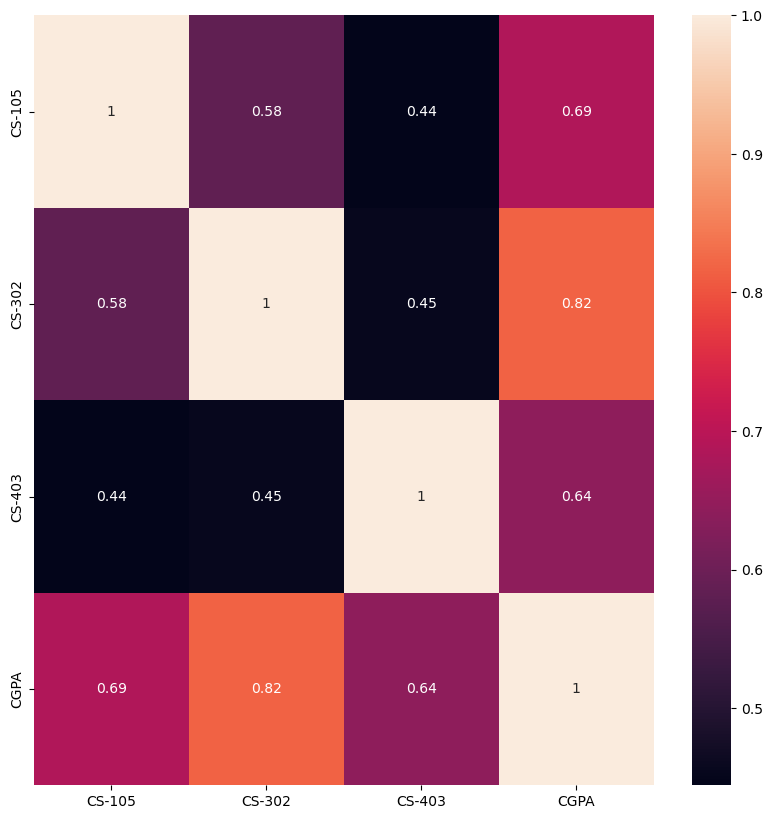

In [122]:
correlation=data_cleaned.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data_cleaned.corr(),annot=True)
plt.show

In [123]:
y = df['CGPA']
y


0      2.205
1      2.008
2      3.608
3      1.906
4      3.448
       ...  
566    3.798
567    3.772
568    3.470
569    2.193
570    1.753
Name: CGPA, Length: 571, dtype: float64

In [150]:
X = df.drop(['Seat No.', 'CGPA'], axis=1)


In [151]:
model = RandomForestClassifier()
y = df['CGPA']
X = df.drop(['Seat No.', 'CGPA'], axis=1)

model.fit(x_train, y_train)

x_test_prediction= model.predict(x_test)

test_data_accuracy = accuracy_score(x_test_prediction, y_test)

print(F'accuracy:',test_data_accuracy)

ValueError: could not convert string to float: 'F'